In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

# STEAM_GAMES

In [5]:
steam_games = pd.read_json('../Datasets/steam_games.json.gz', compression='gzip', lines=True)

* Exploración Inicial

In [6]:
steam_games.describe()

,early_access,id
count,32135.000000,3.213300e+04
mean,0.060588,4.517574e+05
std,0.238577,1.827140e+05
min,0.000000,1.000000e+01
25%,0.000000,3.292800e+05
50%,0.000000,4.520600e+05
75%,0.000000,5.934000e+05
max,1.000000,2.028850e+06


In [9]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26965 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     20146 non-null  object 
 1   genres        24325 non-null  object 
 2   app_name      26964 non-null  object 
 3   title         25476 non-null  object 
 4   url           26965 non-null  object 
 5   release_date  25474 non-null  object 
 6   tags          26841 non-null  object 
 7   reviews_url   26963 non-null  object 
 8   specs         26495 non-null  object 
 9   price         26965 non-null  float64
 10  early_access  26965 non-null  float64
 11  id            26963 non-null  float64
 12  developer     24308 non-null  object 
dtypes: float64(3), object(10)
memory usage: 2.9+ MB


In [10]:
steam_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd
88316,None,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774276/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",9.99,0.0,774276.0,Poppermost Productions


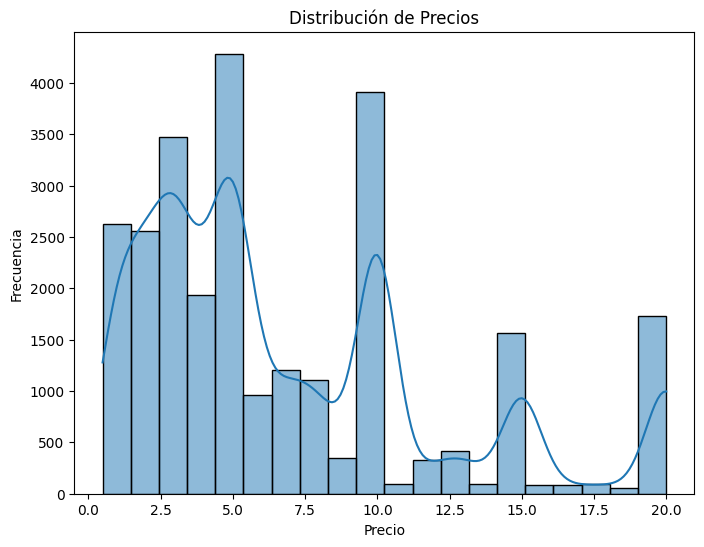

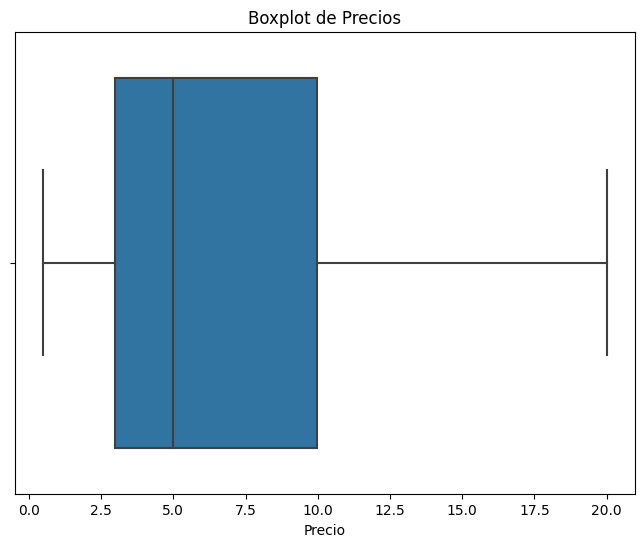

In [12]:
# Histograma de la variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(steam_games['price'], bins=20, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'price' para identificar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=steam_games['price'])
plt.title('Boxplot de Precios')
plt.xlabel('Precio')
plt.show()


In [15]:
steam_games.head(1)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro


# Análisis de Relaciones

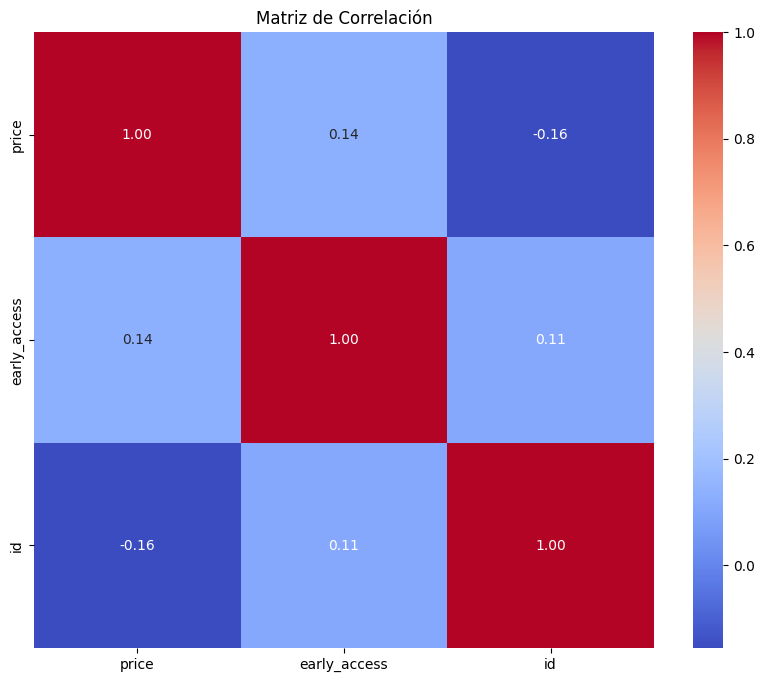

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas numéricas para calcular la correlación
numeric_columns = steam_games.select_dtypes(include=['float64']).columns
correlation_matrix = steam_games[numeric_columns].corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


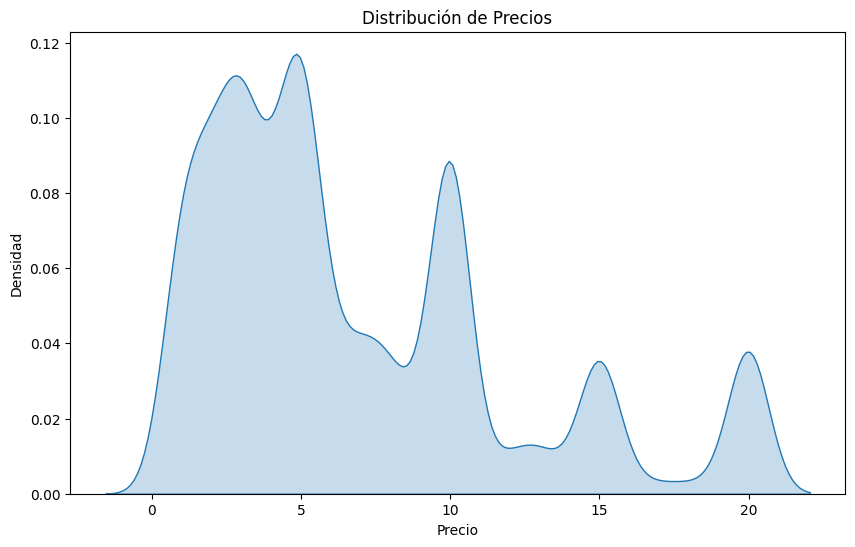

In [24]:
# Gráfico de densidad para visualizar la distribución de 'price'
plt.figure(figsize=(10, 6))
sns.kdeplot(steam_games['price'], fill=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.show()


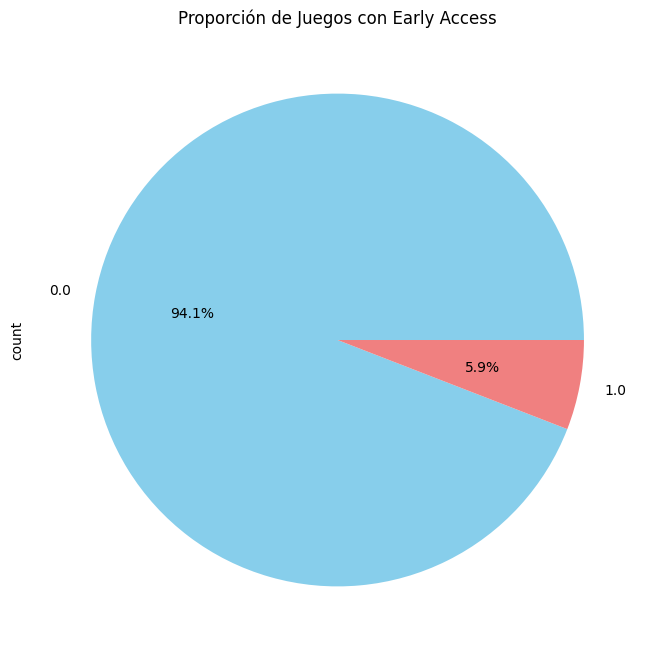

In [29]:
# Gráfico de pastel para visualizar la proporción de juegos con y sin early access
plt.figure(figsize=(8, 8))
steam_games['early_access'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Juegos con Early Access')
plt.show()
